In [63]:
import pandas as pd, numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.feature_selection import SelectKBest, SelectPercentile, mutual_info_classif
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from os import listdir

sns.set(
    font="ABC Sans Nova"
)

metadata = pd.read_excel(
    "./metadata.xlsx",
    sheet_name=1,
    header=10
)

file_names = listdir("./census_data")
file_names = sorted([file_name for file_name in file_names if ".csv" in file_name])

for i, file_name in enumerate(file_names):
    
    key = file_name.split("_")[1]
    
    file_data = pd.read_csv(
        f"./census_data/{file_name}",
        index_col="SAL_CODE_2021"
    )
    
    file_data.columns = [
        metadata[
            (metadata.DataPackfile == key) &
            (metadata.Short == string)
        ].iat[0, 2].lower() for string in file_data.columns
    ]
            
    if i == 0:
        suburb_data = file_data
    
    else:        
        suburb_data = suburb_data.join(
            file_data,
            lsuffix=f"_v{i}"
        )

suburb_data.to_csv("./raw_suburb_data.csv")

act_suburbs = pd.read_csv(
    "./act_suburbs.csv"
)
act_suburbs.code = "SAL" + act_suburbs.code.astype("str")

In [96]:
data = pd.DataFrame(
    index=act_suburbs.code,
    data={
        "name": act_suburbs.name.to_list(),
        "belco":  act_suburbs.belco.to_list()
    }
)

data["population"] = suburb_data.total_persons_persons
data = data[data.population >= 30]
suburb_data = suburb_data.loc[data.index]

data["masculinity"] = suburb_data.total_persons_males / data.population
data["age_under_5"] = suburb_data.age_groups_0_4_years_persons / data.population
data["age_under_15"] = suburb_data.age_groups_5_14_years_persons / data.population + data.age_under_5
data["age_under_20"] = suburb_data.age_groups_15_19_years_persons / data.population + data.age_under_15
data["age_under_25"] = suburb_data.age_groups_20_24_years_persons / data.population + data.age_under_20
data["age_under_35"] = suburb_data.age_groups_25_34_years_persons / data.population + data.age_under_25
data["age_under_45"] = suburb_data.age_groups_35_44_years_persons / data.population + data.age_under_35
data["age_under_55"] = suburb_data.age_groups_45_54_years_persons / data.population + data.age_under_45
data["age_under_65"] = suburb_data.age_groups_55_64_years_persons / data.population + data.age_under_55
data["age_under_75"] = suburb_data.age_groups_65_74_years_persons / data.population + data.age_under_65
data["age_under_85"] = suburb_data.age_groups_75_84_years_persons / data.population + data.age_under_75
data["indigenous"] = suburb_data.aboriginal_and_or_torres_strait_islander_persons_total_persons / data.population
data["born_overseas"] = suburb_data.birthplace_elsewhere_persons / data.population
data["other_language"] = suburb_data.language_used_at_home_other_language_persons / data.population
data["citizens"] = suburb_data.australian_citizen_persons / data.population
data["median_age"] = suburb_data.median_age_of_persons
data["median_mortgage_repayment"] = suburb_data.median_mortgage_repayment_monthly
data["median_personal_income"] = suburb_data.median_total_personal_income_weekly
data["median_rent"] = suburb_data.median_rent_weekly
data["median_family_income"] = suburb_data.median_total_family_income_weekly
data["avg_people_bedroom"] = suburb_data.average_number_of_persons_per_bedroom
data["median_household_income"] = suburb_data.median_total_household_income_weekly
data["avg_household_size"] = suburb_data.average_household_size
# data["marriage_divorce_ratio_men"] = suburb_data.males_total_married / suburb_data.males_total_divorced
# data["marriage_divorce_ratio_women"] = suburb_data.females_total_married / suburb_data.females_total_divorced
data["marriage_divorce_ratio"] = suburb_data.persons_total_married / suburb_data.persons_total_divorced
data["australian_parents"] = suburb_data.australian_both_parents_born_in_australia / data.population

data

,name,belco,population,masculinity,age_under_5,age_under_15,age_under_20,age_under_25,age_under_35,age_under_45,...,median_age,median_mortgage_repayment,median_personal_income,median_rent,median_family_income,avg_people_bedroom,median_household_income,avg_household_size,marriage_divorce_ratio,australian_parents
code,,,,,,,,,,,,,,,,,,,,,
SAL80017,Acton,0,2848.0,0.448385,0.001756,0.001756,0.510885,0.883076,0.976826,0.994733,...,19,0,257,9,0,1.0,0,1.0,9.200000,0.199087
SAL80018,Ainslie,0,5376.0,0.471726,0.048549,0.166481,0.221726,0.294457,0.406622,0.535714,...,42,2600,1236,367,3578,0.8,2434,2.5,4.264151,0.248698
SAL80019,Amaroo,0,6129.0,0.495676,0.060858,0.226138,0.305760,0.370370,0.498287,0.654430,...,35,2158,1207,460,3089,0.8,2769,2.9,7.631268,0.286180
SAL80020,Aranda,1,2605.0,0.487524,0.054511,0.196929,0.251440,0.314395,0.418042,0.550480,...,42,2500,1372,530,3533,0.8,3161,2.8,8.141844,0.247601
SAL80021,Banks,0,5100.0,0.499020,0.062549,0.212353,0.280588,0.349412,0.497255,0.648627,...,35,2000,1168,424,2741,0.8,2419,2.8,5.354571,0.296863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SAL80131,Watson,0,6727.0,0.484466,0.065408,0.199792,0.246767,0.313215,0.502453,0.687379,...,34,2067,1354,437,3066,0.8,2414,2.4,5.084821,0.240077
SAL80132,Weetangera,1,2795.0,0.499106,0.046512,0.184258,0.260107,0.318068,0.419678,0.547406,...,41,2500,1332,490,3730,0.8,3349,2.9,11.787611,0.265116
SAL80133,Weston,0,4000.0,0.483250,0.057000,0.189500,0.241500,0.288500,0.393500,0.535500,...,42,2200,1242,420,3082,0.8,2361,2.5,4.924012,0.248500


In [97]:
suburb_data.columns.tolist()

['total_persons_males',
 'total_persons_females',
 'total_persons_persons',
 'age_groups_0_4_years_males',
 'age_groups_0_4_years_females',
 'age_groups_0_4_years_persons',
 'age_groups_5_14_years_males',
 'age_groups_5_14_years_females',
 'age_groups_5_14_years_persons',
 'age_groups_15_19_years_males',
 'age_groups_15_19_years_females',
 'age_groups_15_19_years_persons',
 'age_groups_20_24_years_males',
 'age_groups_20_24_years_females',
 'age_groups_20_24_years_persons',
 'age_groups_25_34_years_males',
 'age_groups_25_34_years_females',
 'age_groups_25_34_years_persons',
 'age_groups_35_44_years_males',
 'age_groups_35_44_years_females',
 'age_groups_35_44_years_persons',
 'age_groups_45_54_years_males',
 'age_groups_45_54_years_females',
 'age_groups_45_54_years_persons',
 'age_groups_55_64_years_males',
 'age_groups_55_64_years_females',
 'age_groups_55_64_years_persons',
 'age_groups_65_74_years_males',
 'age_groups_65_74_years_females',
 'age_groups_65_74_years_persons',
 'age_

<AxesSubplot: xlabel='marriage_divorce_ratio', ylabel='Count'>

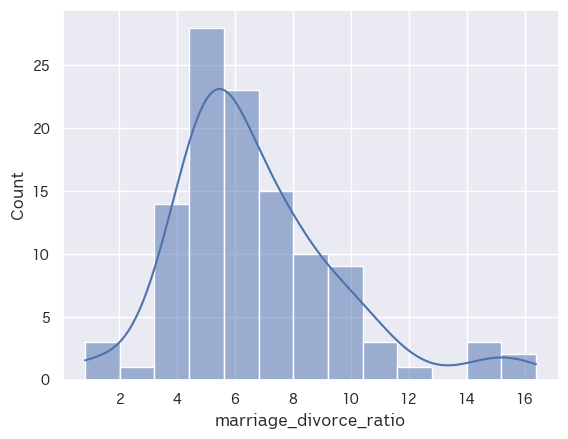

In [99]:
sns.histplot(
    data=data.marriage_divorce_ratio,
    kde=True
)

In [100]:
X = data.iloc[:, 3:]
y = data.loc[:, "belco"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    random_state=0,
    test_size=0.25
)
clf = Pipeline([
    ("scaler", StandardScaler()),
    ("model", LogisticRegression(n_jobs=4))
]).fit(X_train, y_train)

mi_scores = pd.Series(
    index=X.columns,
    data=mutual_info_classif(X, y)
).sort_values(ascending=False)

# selector = SelectKBest(
#     mutual_info_classif,
#     k=5
# )
# X_reduced = selector.fit_transform(X, y)

mi_scores


age_under_5                  0.074790
avg_household_size           0.074296
age_under_15                 0.044808
age_under_85                 0.042342
median_rent                  0.040331
age_under_75                 0.038677
age_under_45                 0.035176
age_under_20                 0.033442
median_personal_income       0.031539
age_under_55                 0.025047
age_under_35                 0.021853
median_age                   0.017330
australian_parents           0.015369
age_under_25                 0.012243
born_overseas                0.009358
indigenous                   0.007852
age_under_65                 0.006554
citizens                     0.003222
median_household_income      0.001801
median_mortgage_repayment    0.000000
other_language               0.000000
median_family_income         0.000000
avg_people_bedroom           0.000000
marriage_divorce_ratio       0.000000
masculinity                  0.000000
dtype: float64